Intro:

A multivariate normal distribution is written as:

$
\mathcal{N}(x \hspace{1pt} | \hspace{1pt} \mu, \sigma) \equiv \dfrac{1}{(2 \pi)^{D/2} | \Sigma |^{1/2} } \exp{\Big[ - \dfrac{1}{2} (\textbf{x} - \mu)^T \Sigma^{-1} (\textbf{x} - \mu) \Big]} 
$

Below we plot several examples of  bivariate normal ($D=2$).

In [1]:
import numpy as np
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
param1 = {'mu': np.array([5, 7]), 'sigma': np.array([[1, 0], [0, 1]])}
param2 = {'mu': np.array([5, 7]), 'sigma': np.array([[0.3, 0], [0, 0.7]])}
param3 = {'mu': np.array([5, 7]), 'sigma': np.array([[1, 0.4], [0.4, 1]])}
param4 = {'mu': np.array([5, 7]), 'sigma': np.array([[1, -0.8], [-0.8, 1]])}

params = [param1, param2, param3, param4]

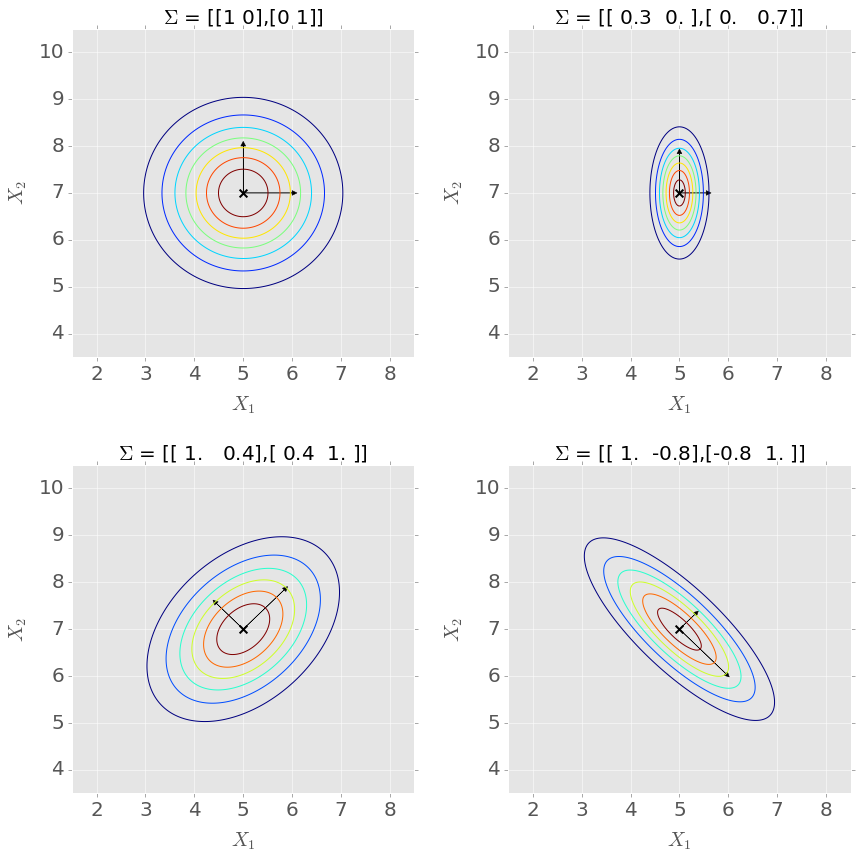

In [4]:
FONTSIZE = 20
plt.close('all')
fig = plt.figure(figsize=(12, 12))
gs = matplotlib.gridspec.GridSpec(2, 2, width_ratios=[1, 1])

counter = 0
for dummy_i in range(2):
    for dummy_j in range(2):
        mu = params[counter]['mu']
        sigma = params[counter]['sigma']
        
        x1 = np.linspace(mu[0]-2.5, mu[0]+2.5, 200)
        x2 = np.linspace(mu[1]-2.5, mu[1]+2.5, 200)
        X1, X2 = np.meshgrid(x1, x2)

        Z = bivariate_normal(X1, X2, sigma[0,0], sigma[1, 1], mu[0], mu[1], sigma[0, 1])
        
        ax = plt.subplot(gs[dummy_i, dummy_j])
        
        X1_MIN, X1_MAX = np.min(x1)-1, np.max(x1)+1
        X2_MIN, X2_MAX = np.min(x2)-1, np.max(x2)+1

        ax.contour(X1, X2, Z)
        ax.scatter(mu[0], mu[1], color='k', marker='x', s=60, lw=2)
        
        ax.set_xlim(X1_MIN, X1_MAX)
        ax.set_ylim(X2_MIN, X2_MAX)
        ax.set_xlabel(r'$X_1$', fontsize=FONTSIZE, labelpad=10)
        ax.set_ylabel(r'$X_2$', fontsize=FONTSIZE, labelpad=10)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(FONTSIZE)
            tick.label.set_rotation(0)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(FONTSIZE)
            tick.label.set_rotation(0) 
            
        # plot principal axes    
        eig_vals, eig_vecs = np.linalg.eig(sigma)
        d_vec = np.sqrt(eig_vals[0]) * eig_vecs[:,0]
        ax.arrow(mu[0], mu[1], d_vec[0], d_vec[1], head_width=0.1, head_length=0.1, fc='k', ec='k')
        d_vec = np.sqrt(eig_vals[1]) * eig_vecs[:,1]
        ax.arrow(mu[0], mu[1], d_vec[0], d_vec[1], head_width=0.1, head_length=0.1, fc='k', ec='k')
                                        
        ax.set_title(r'$\Sigma$ = [{0:},{1:}]'.format(sigma[0,:], sigma[1,:]), fontsize=FONTSIZE)
        
        counter += 1
plt.tight_layout(w_pad=3, h_pad=3)        